In [62]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from textblob import TextBlob
from datetime import datetime, date
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

In [64]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\jayesh
[nltk_data]     kartik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
data = pd.read_csv('C:\\Users\\jayesh kartik\\Desktop\\stockerbot-export.csv', sep=',', error_bad_lines=False, parse_dates=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head(5)

C:\Users\jayesh kartik\AppData\Local\Temp\ipykernel_5916\2324358036.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:\\Users\\jayesh kartik\\Desktop\\stockerbot-export.csv', sep=',', error_bad_lines=False, parse_dates=True)
b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18 21:33:26+00:00,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,2018-07-18 22:22:47+00:00,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,2018-07-18 22:32:01+00:00,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,2018-07-18 22:52:52+00:00,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,2018-07-18 23:00:01+00:00,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [66]:
print('There are', data.shape[0], 'tweets in the dataset')

There are 28264 tweets in the dataset


C:\Users\jayesh kartik\AppData\Local\Temp\ipykernel_5916\2833438974.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


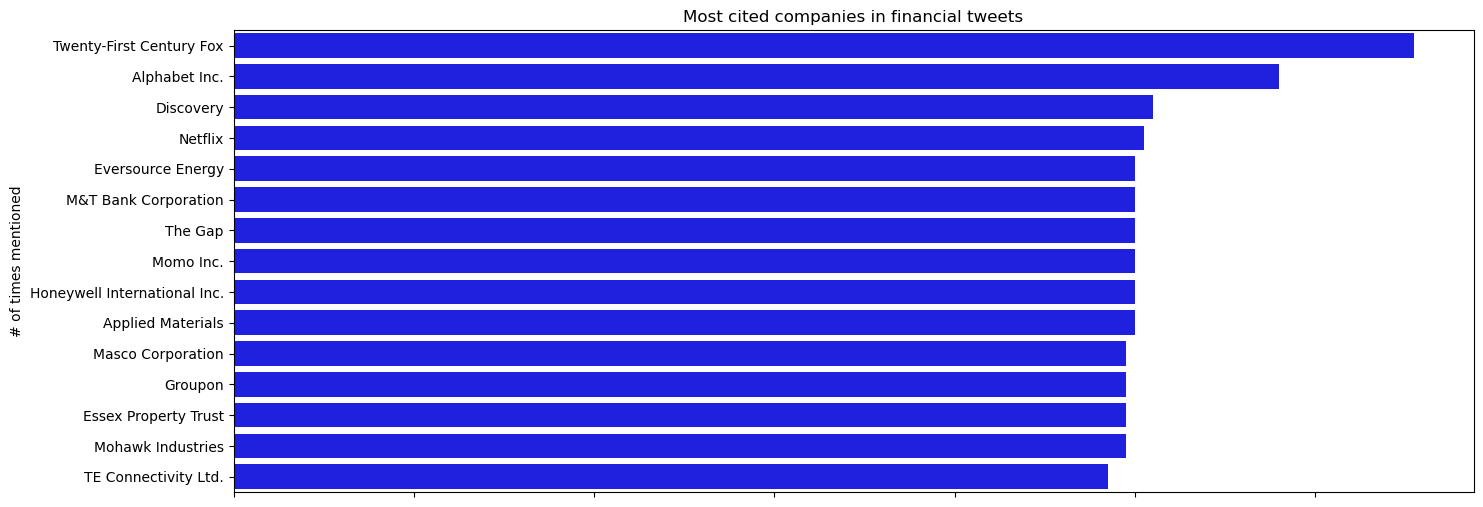

In [109]:
# Define function to plot bar chart
def plot_bars(data, x, y, xlabel=None, ylabel="occurrences", title=None):
    fig = plt.figure(figsize=(16, 6))
    chart = sns.barplot(data=data, y=y, x=x, color='blue')  # set color to blue
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Calculate top cited companies
top_cited_companies = data.groupby('company_names').count().sort_values(by='id', ascending=False).reset_index()

# Call function to plot bar chart
plot_bars(data=top_cited_companies.iloc[0:15], x='id', y='company_names', 
          ylabel='# of times mentioned', title='Most cited companies in financial tweets')

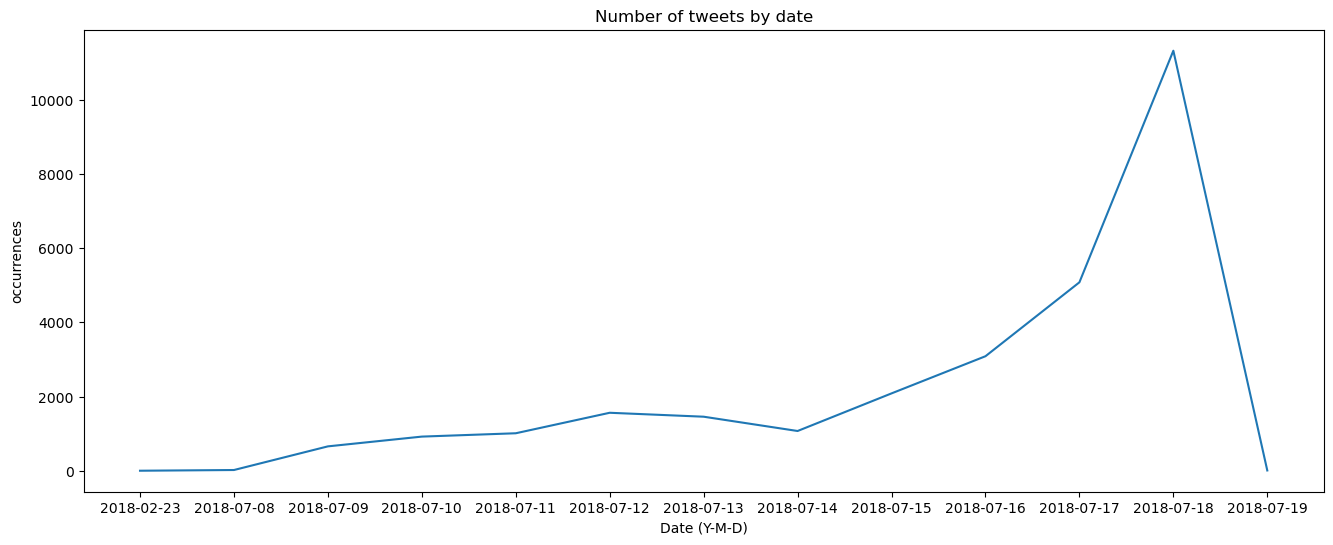

In [112]:
# Define function to plot line chart
def plot_line(data, x, y, xlabel=None, ylabel="occurrences", title=None):
    fig = plt.figure(figsize=(16, 6))
    plt.plot(data[x], data[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Calculate tweet counts by date
data['y-m-d'] = data['timestamp'].apply(lambda x: '{}-{}-{}'.format(x.year, str(x.month).zfill(2), str(x.day).zfill(2)))
time_data = data.groupby('y-m-d').count().reset_index().sort_values(by='y-m-d')

# Call function to plot line chart
plot_line(data=time_data, x='y-m-d', y='id', 
          xlabel="Date (Y-M-D)", title='Number of tweets by date')

In [113]:
data_filtered = data[data['timestamp'].apply(lambda x: x.date()) >= date(2018,7,9)]
highly_mentionned_companies = list(top_cited_companies[top_cited_companies['id'] >= 50]['company_names'])
data_filtered = data_filtered[data_filtered['company_names'].apply(lambda x: x in highly_mentionned_companies)].reset_index()
data_filtered

,index,id,text,timestamp,source,symbols,company_names,url,verified,y-m-d,sentiment_polarity,positive_score,negative_score,neutral_score,sentiment
0,3,1019716662587740200,barry silbert extremely optimistic bitcoin pre...,2018-07-18 22:52:52+00:00,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,2018-07-18,0.005682,0.191,0.000,0.809,Positive
1,8,1019720723441635300,senate wants emergency alerts go netflix spoti...,2018-07-18 23:09:00+00:00,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True,2018-07-18,0.2,0.000,0.271,0.729,Negative
2,9,1019721145396887600,hedge fund manager marc larsy says bitcoin 40k...,2018-07-18 23:10:41+00:00,MarketWatch,BTC,Bitcoin,https://on.mktw.net/2Ntr7k9,True,2018-07-18,0.0,0.000,0.000,1.000,Neutral
3,17,1019729988017377300,white house struggles contain fallout trumpput...,2018-07-18 23:45:49+00:00,Reuters,UDR,UDR,https://reut.rs/2NrEv8t,True,2018-07-18,0.0,0.000,0.294,0.706,Negative
4,21,1019737727477174300,templeton blackrock say nows time buy emerging...,2018-07-19 00:16:34+00:00,business,BLK,BlackRock,https://bloom.bg/2NmXZLe,True,2018-07-19,0.0,0.000,0.000,1.000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24461,28259,1019730088617635800,fb 29234a9c7f084d5a985fcb1a5554ecf9,2018-07-18 23:46:13+00:00,test5f1798,FB,Facebook,NaN,False,2018-07-18,0.0,0.000,0.000,1.000,Neutral
24462,28260,1019730115524288500,仮想通貨ビットコインの価格上昇８０万円台回復 約１カ月半ぶり btc,2018-07-18 23:46:19+00:00,keizai_toushi17,BTC,Bitcoin,http://keizai-toushi-navi.com/?p=26838,False,2018-07-18,0.0,0.000,0.000,1.000,Neutral
24463,28261,1019730115805184000,rt nuff said tel telcoin telfam crypto blockch...,2018-07-18 23:46:19+00:00,iad81,BTC,Bitcoin,https://twitter.com/CRYPTOVERLOAD/status/10178...,False,2018-07-18,0.0,0.000,0.000,1.000,Neutral
24464,28262,1019730117252341800,仮想通貨ビットコインの価格上昇８０万円台回復 約１カ月半ぶり btc,2018-07-18 23:46:20+00:00,O8viWMyrCV6cBOZ,BTC,Bitcoin,http://true.velvet.jp/monexx/archives/2357,False,2018-07-18,0.0,0.000,0.000,1.000,Neutral


In [70]:
import re
import string

In [71]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\jayesh
[nltk_data]     kartik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\jayesh
[nltk_data]     kartik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
def remove_punctuation(txt):
    """Returns the string txt without punctuation."""
    return txt.translate(str.maketrans('', '', string.punctuation.replace("'", "") + "’·➡️\“”…")) 

def preprocess_txt(txt):
    #Remove links
    link_regex = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
    txt = re.sub(link_regex, r'', txt)
    txt = txt.replace("’", "'")
    #Remove punctuation
    txt = remove_punctuation(txt)
    txt = txt.lower()
    return txt

In [73]:
# Frequent tokens
tokens_frequency = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(data_filtered['text'].apply(preprocess_txt))))

In [74]:
df_tokens_frequency = pd.DataFrame.from_dict(tokens_frequency, orient='index').reset_index()
df_tokens_frequency.rename({'index': 'token', 0: 'count'}, axis=1, inplace=True)
df_tokens_frequency = df_tokens_frequency[df_tokens_frequency['token'].apply(lambda x: x not in nltk.corpus.stopwords.words('english'))]
df_tokens_frequency.sort_values(by='count', ascending=False).head(30)

,token,count
58,rt,4208
426,inc,3432
171,amp,2314
52,'s,1788
185,stock,1613
173,earnings,1607
328,price,1551
597,analysts,1420
377,eps,1185
72,us,1102


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

freq = TfidfVectorizer(preprocessor=preprocess_txt,
                       stop_words=nltk.corpus.stopwords.words('english'),
                      min_df=2) #Keep only tokens with more than 2 occurences

X = freq.fit_transform(data_filtered['text'])

In [76]:
print('Tweets were encoded as a', X.shape[1], 'dimensions sparse vector')

Tweets were encoded as a 13200 dimensions sparse vector


In [77]:
data_filtered['text'].iloc[0]

'Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY'

In [78]:
[w for w in preprocess_txt(data_filtered['text'].iloc[0]).split() if w not in nltk.corpus.stopwords.words('english')]

['barry',
 'silbert',
 'extremely',
 'optimistic',
 'bitcoin',
 'predicts',
 '99',
 'new',
 'crypto',
 'entrants',
 'going',
 'zero']

In [79]:
X[0].data # We only show the values that are nonzeros in the sparse vector

array([0.37276231, 0.25814527, 0.21366622, 0.17025802, 0.3226162 ,
       0.23714738, 0.37903597, 0.33911793, 0.40724586, 0.36732781])

In [80]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=500)
X_pca=pca.fit_transform(X)

<AxesSubplot:>

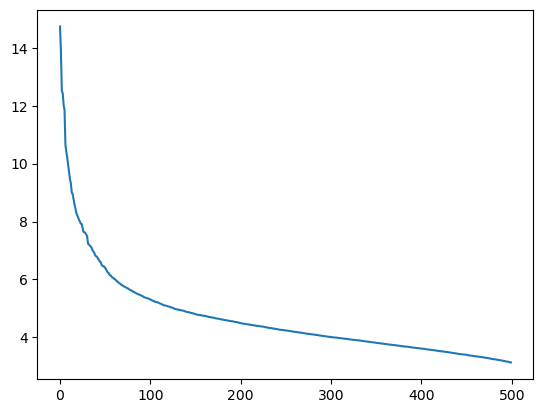

In [81]:
# There is an elbow around the 100-th singular value. 
# This means that we could keep only the first 100th value for data to be representative
sns.lineplot(data=pca.singular_values_)

In [82]:
# We tried clustering using only the first 100-th coordinates. But we were dissatisfied with the results.
# So we use the whole 500 coordinates. 
X_reduced = X_pca#[:,:100]

In [83]:
from sklearn.cluster import KMeans

losses = []
k_parameters = list(range(1,30))

for k in k_parameters:
    kmean = KMeans(n_clusters=k, max_iter=6000)
    kmean.fit(X_reduced)
    losses.append(- kmean.score(X_reduced))



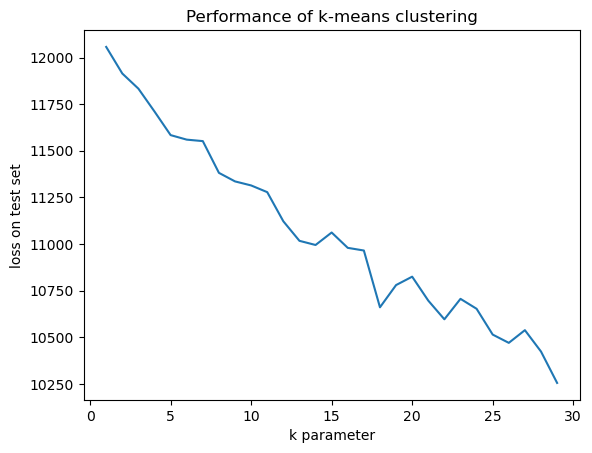

In [84]:
plt.plot(k_parameters, losses)
plt.xlabel('k parameter')
plt.ylabel('loss on test set')
plt.title('Performance of k-means clustering')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


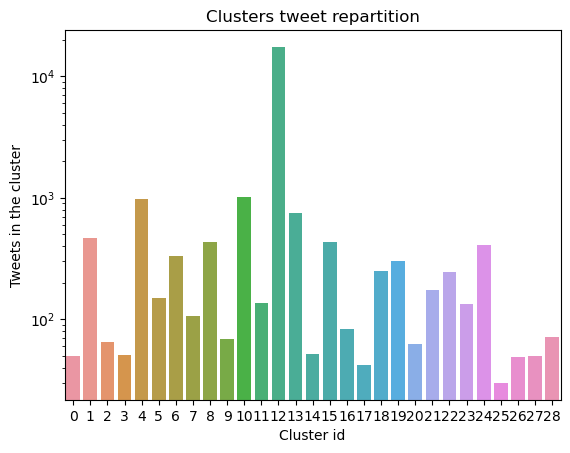

In [85]:
c_predicted = kmean.predict(X_reduced)
classes, classes_count = np.unique(c_predicted, return_counts=True)

sns.barplot(classes, classes_count)
plt.yscale('log')
plt.ylabel('Tweets in the cluster')
plt.xlabel('Cluster id')
plt.title('Clusters tweet repartition')
plt.show()

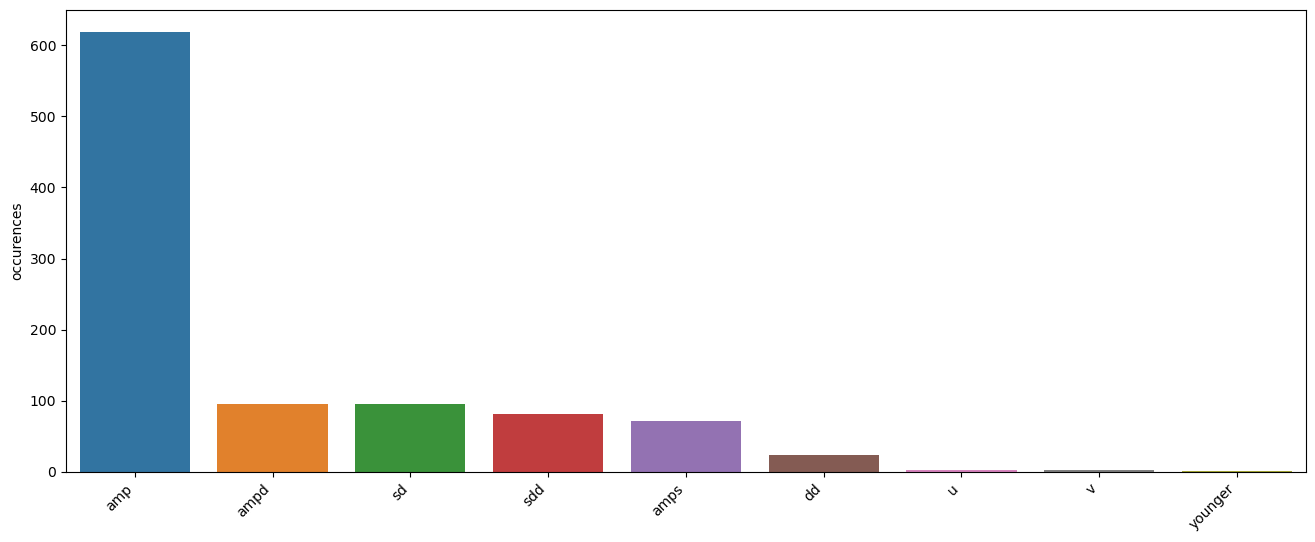

In [86]:
def get_most_frequent_tokens(data_text):
    tokens_frequency = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(data_text.apply(preprocess_txt))))
    df_tokens_frequency = pd.DataFrame.from_dict(tokens_frequency, orient='index').reset_index()
    df_tokens_frequency.rename({'index': 'token', 0: 'count'}, axis=1, inplace=True)
    df_tokens_frequency = df_tokens_frequency[df_tokens_frequency['token'].apply(lambda x: x not in nltk.corpus.stopwords.words('english'))]
    df_tokens_frequency = df_tokens_frequency.sort_values(by='count', ascending=False).head(30)
    return df_tokens_frequency

bar_plot(get_most_frequent_tokens(data_filtered.iloc[c_predicted==7]['text']), 'token', 'count')

In [87]:
get_most_frequent_tokens(data_filtered.iloc[c_predicted==2]['text'])

,token,count
8,copy,76
2,traders,65
3,automatically,65
5,bitcoin,65
6,💰💰,65
9,wangzai888,65
1,skilled,28
15,replicate,21
16,lucrative,19
0,duplicate,18


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129297 (\N{MONEY-MOUTH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\si

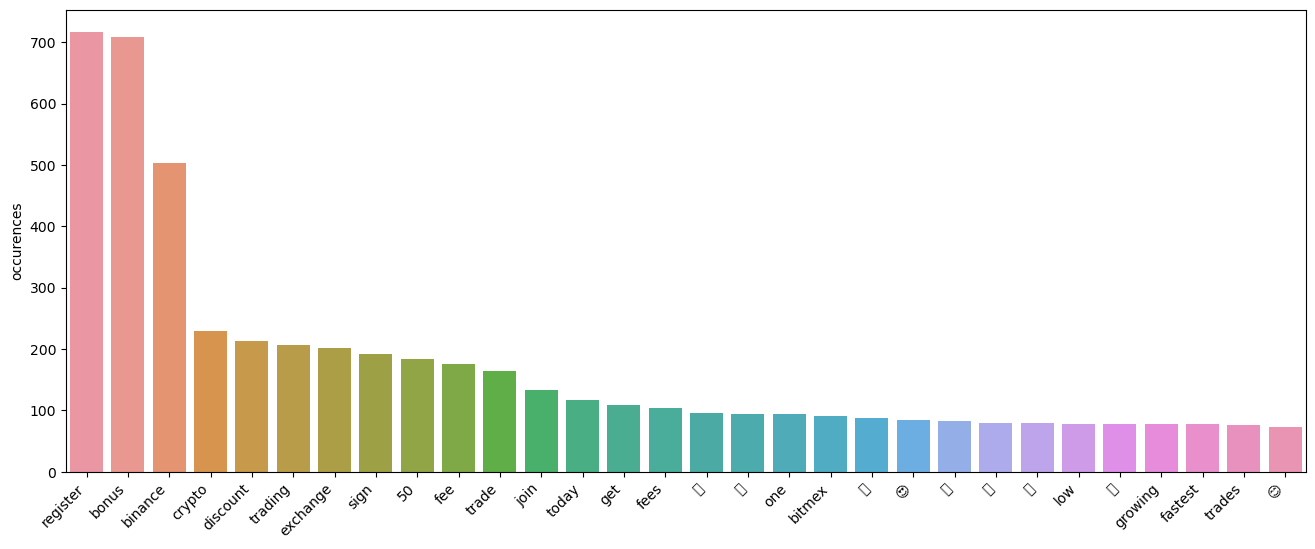

In [88]:
bar_plot(get_most_frequent_tokens(data_filtered.iloc[c_predicted==13]['text']), 'token', 'count')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129297 (\N{MONEY-MOUTH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib

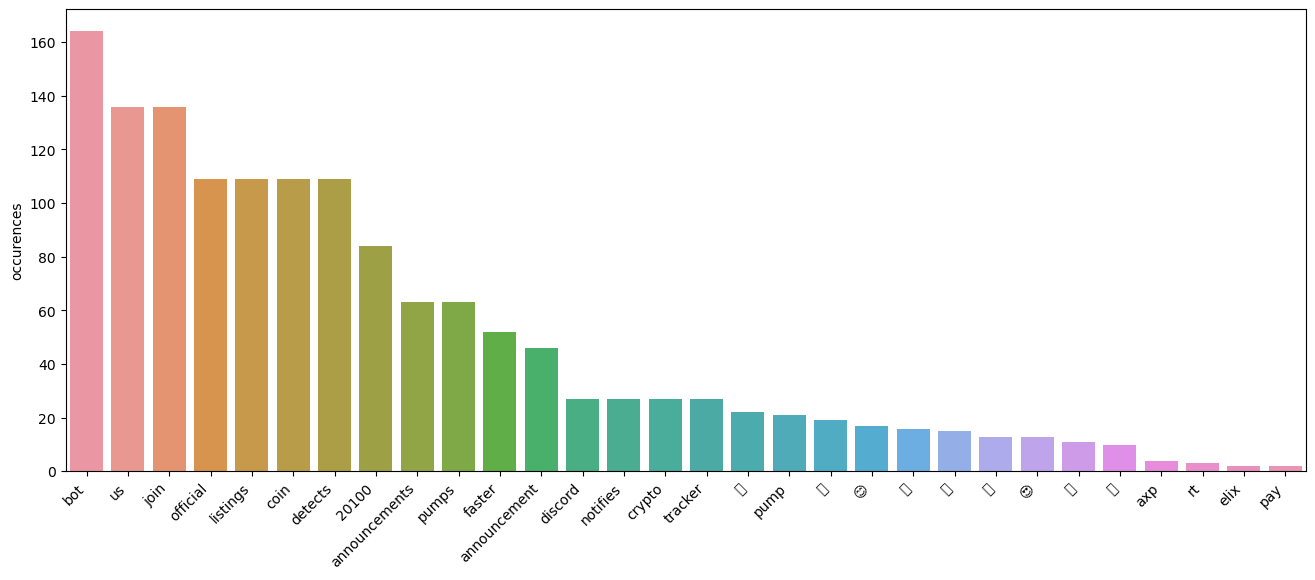

In [89]:
bar_plot(get_most_frequent_tokens(data_filtered.iloc[c_predicted==11]['text']), 'token', 'count')

In [90]:
data_filtered.iloc[c_predicted==11]['text']

11479    Coin listings pumps 20-100%. Our bot detects i...
11915    Our bot on Discord notifies faster than Crypto...
12057    Our bot on Discord notifies faster than Crypto...
12132    Coin listings pumps 20-100%. Our bot detects i...
12258    Coin listings pumps 20-100%. Our bot detects i...
                               ...                        
24034    Our bot on Discord notifies faster than Crypto...
24058    Our bot on Discord notifies faster than Crypto...
24156    Coin listings pumps 20-100%. Our bot detects i...
24161    Coin listings pump 20-100%+. Our bot detects b...
24190    Our bot on Discord notifies faster than Crypto...
Name: text, Length: 136, dtype: object

In [91]:
# create a new column in the dataframe to store the sentiment polarity
data['sentiment_polarity'] = None

# iterate over each row in the dataframe
for i, row in data.iterrows():
    # get the text of the tweet
    tweet = row['text']
    
    # perform sentiment analysis using TextBlob
    sentiment = TextBlob(tweet).sentiment.polarity
    
    # store the sentiment polarity in the dataframe
    data.at[i, 'sentiment_polarity'] = sentiment

# print the first 10 rows of the dataframe
print(data.head(10))

                    id                                               text  \
0  1019696670777503700  VIDEO: “I was in my office. I was minding my o...   
1  1019709091038548000  The price of lumber $LB_F is down 22% since hi...   
2  1019711413798035500  Who says the American Dream is dead? https://t...   
3  1019716662587740200  Barry Silbert is extremely optimistic on bitco...   
4  1019718460287389700  How satellites avoid attacks and space junk wh...   
5  1019719465095790600  .@RealMoney's David Butler's favorite FANG sto...   
6  1019720209786114000  Don’t miss my convo with one of my favorite th...   
7  1019720659738480600  U.S. intelligence documents on Nelson Mandela ...   
8  1019720723441635300  Senate wants emergency alerts to go out throug...   
9  1019721145396887600  Hedge fund manager Marc Larsy says bitcoin $40...   

                  timestamp        source        symbols  \
0 2018-07-18 21:33:26+00:00  GoldmanSachs             GS   
1 2018-07-18 22:22:47+00:00    S

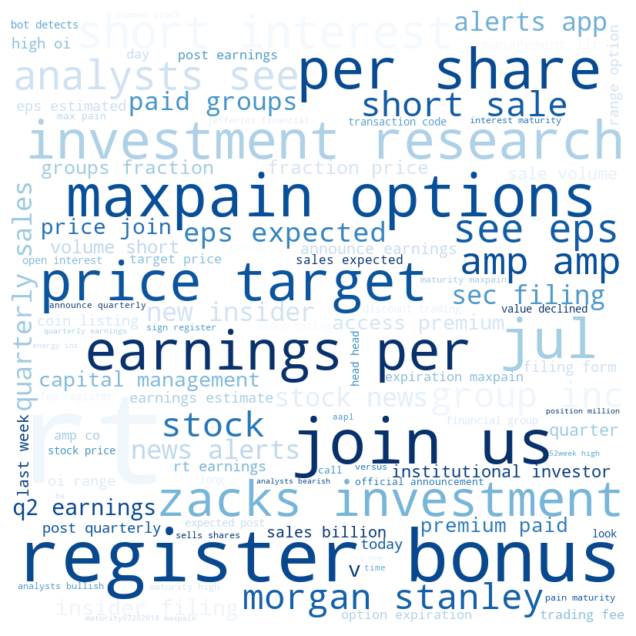

In [92]:
# remove URLs and punctuation marks
data['text'] = data['text'].str.replace(r'http\S+|www.\S+|@\S+', '', regex=True)
data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)

# tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.lower() not in stop_words])

# flatten the list of tokenized words
words_list = []
for words in data['text']:
    words_list += words

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, colormap='Blues').generate(' '.join(words_list))

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

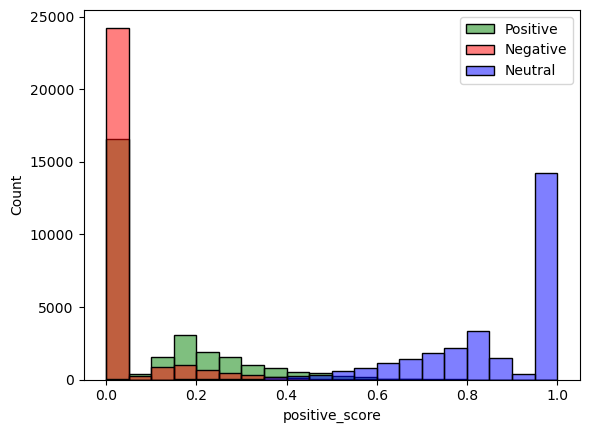

Number of positive tweets: 11030
Number of negative tweets: 2950
Number of neutral tweets: 14284


In [93]:
# initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# apply the sentiment analyzer to each tweet and store the scores
sentiment_scores = data['text'].apply(lambda x: sid.polarity_scores(' '.join(x)))

# extract the positive, negative, and neutral scores and add them to the dataframe
data['positive_score'] = [score['pos'] for score in sentiment_scores]
data['negative_score'] = [score['neg'] for score in sentiment_scores]
data['neutral_score'] = [score['neu'] for score in sentiment_scores]

# classify each tweet as positive, negative, or neutral based on the sentiment scores
data['sentiment'] = np.where(data['positive_score'] > data['negative_score'], 'Positive',
                             np.where(data['positive_score'] < data['negative_score'], 'Negative', 'Neutral'))

# plot the distribution of sentiment scores
sns.histplot(data, x='positive_score', bins=20, color='green', alpha=0.5, label='Positive')
sns.histplot(data, x='negative_score', bins=20, color='red', alpha=0.5, label='Negative')
sns.histplot(data, x='neutral_score', bins=20, color='blue', alpha=0.5, label='Neutral')
plt.legend()
plt.show()

# print the number of positive, negative, and neutral tweets
print("Number of positive tweets:", data[data['sentiment'] == 'Positive'].shape[0])
print("Number of negative tweets:", data[data['sentiment'] == 'Negative'].shape[0])
print("Number of neutral tweets:", data[data['sentiment'] == 'Neutral'].shape[0])

In [94]:
# preprocess the text data by removing stop words, URLs, and punctuations
stop_words = set(nltk.corpus.stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join(word.lower() for word in str(x).split() if word.lower() not in stop_words))
data['text'] = data['text'].str.replace('http\S+|www.\S+', '', case=False)
data['text'] = data['text'].str.replace('[^\w\s]', '')

C:\Users\jayesh kartik\AppData\Local\Temp\ipykernel_5916\707006659.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\jayesh kartik\AppData\Local\Temp\ipykernel_5916\707006659.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[^\w\s]', '')


In [95]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

In [96]:
# vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [97]:
# train and test a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_predictions = lr_model.predict(X_test_vec)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')
lr_cm = confusion_matrix(y_test, lr_predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


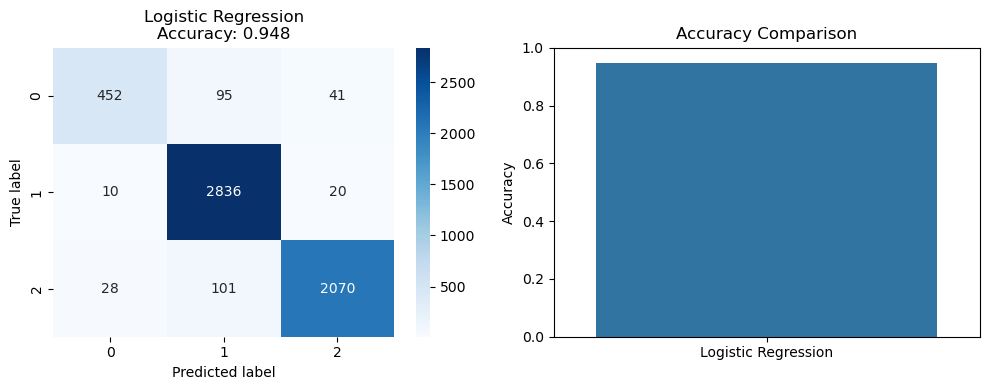

In [98]:
# plot the accuracy and confusion matrix for logistic regression model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Logistic Regression\nAccuracy: {:.3f}'.format(lr_accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(1, 2, 2)
sns.barplot(x=['Logistic Regression'], y=[lr_accuracy])
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [99]:
# train and test a random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
rf_predictions = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
rf_cm = confusion_matrix(y_test, rf_predictions)

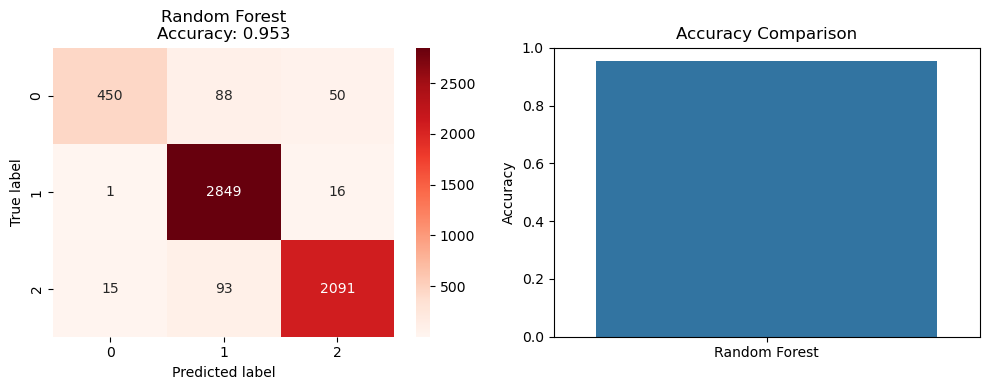

In [100]:
# plot the accuracy and confusion matrix for random forest model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Reds')
plt.title('Random Forest\nAccuracy: {:.3f}'.format(rf_accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(1, 2, 2)
sns.barplot(x=['Random Forest'], y=[rf_accuracy])
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [101]:
# train and test a multinomial naive bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_predictions = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1_score = f1_score(y_test, nb_predictions, average='weighted')
nb_cm = confusion_matrix(y_test, nb_predictions)


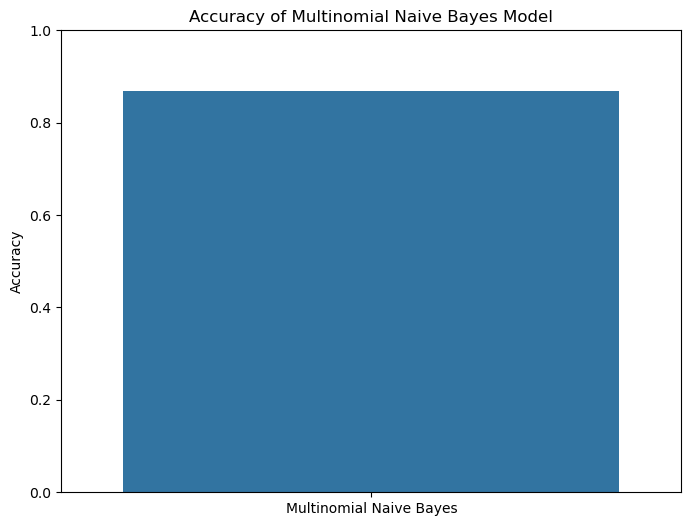

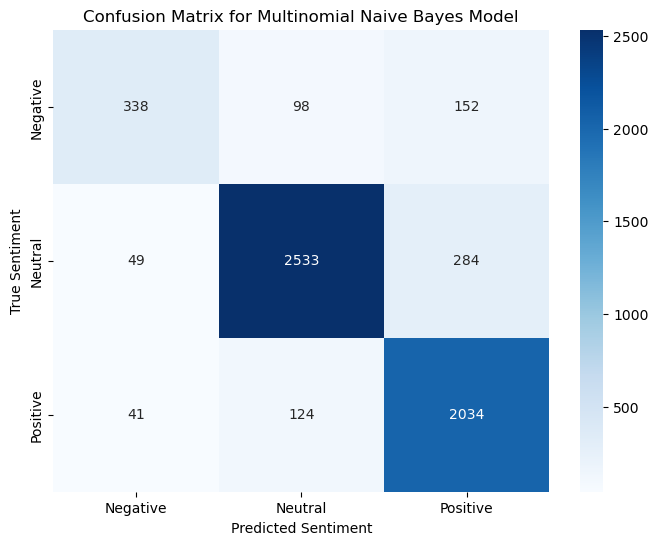

In [102]:
# plot the accuracy and confusion matrix for multinomial naive bayes model
# plot the accuracy
plt.figure(figsize=(8,6))
sns.barplot(x=['Multinomial Naive Bayes'], y=[nb_accuracy])
plt.title("Accuracy of Multinomial Naive Bayes Model")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

# plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Multinomial Naive Bayes Model")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()

In [103]:
# print the results
print("Logistic Regression: accuracy={:.3f}, f1_score={:.3f}".format(lr_accuracy, lr_f1_score))
print(lr_cm)
print("Random Forest: accuracy={:.3f}, f1_score={:.3f}".format(rf_accuracy, rf_f1_score))
print(rf_cm)
print("Multinomial Naive Bayes: accuracy={:.3f}, f1_score={:.3f}".format(nb_accuracy, nb_f1_score))
print(nb_cm)

Logistic Regression: accuracy=0.948, f1_score=0.947
[[ 452   95   41]
 [  10 2836   20]
 [  28  101 2070]]
Random Forest: accuracy=0.953, f1_score=0.952
[[ 450   88   50]
 [   1 2849   16]
 [  15   93 2091]]
Multinomial Naive Bayes: accuracy=0.868, f1_score=0.865
[[ 338   98  152]
 [  49 2533  284]
 [  41  124 2034]]
